In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib import pyplot as plt
import numpy as np

In [22]:
# Read the dataset
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')
data = data[(data['longitude'] <= 20) & (data['longitude'] >= -20)]

In [23]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude', 'ground_speed', 'track', 'vertical_rate', 'Climbing', 'Descending', 'Cruise']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

In [24]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.01, random_state=42)

In [25]:
# Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [26]:
# Creating an XGBoost Regression model
#model = XGBRegressor(random_state=42)
model = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.05, max_depth = 7, n_estimators = 300, subsample = 0.8, random_state=42)

# Training the model
model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
print("Model trained successfully")

Model trained successfully


In [27]:
# Predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluating the model
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("MAE and R2 scores:", mae_train, mae_test, r2_train, r2_test)

MAE and R2 scores: 207.39771739439516 234.214173249953 0.9895913309286501 0.9850652596975147


In [28]:
# Separating the predictions and true values for latitude, longitude, and altitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating and printing metrics for latitude, longitude, and altitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.04893412198604624 0.056348618722576384 0.9994529137373008 0.9955895000594884
Longitude metrics: 0.06414465120278076 0.0691146095827038 0.9953475831140054 0.9917939592609436
Altitude metrics: 622.0800734099976 702.5170565215543 0.9739734959346381 0.9678123197721118


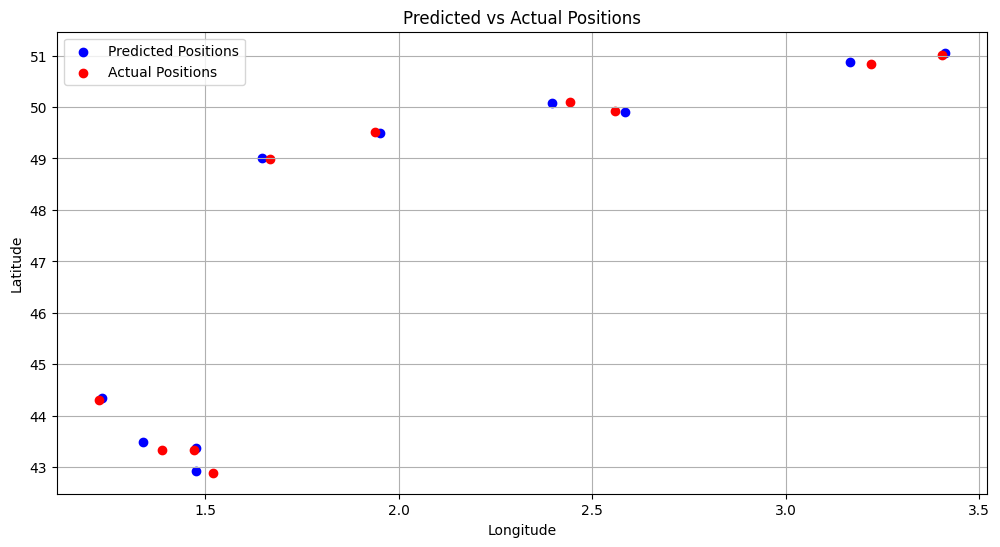

In [32]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(8)
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))

# Plotting predicted positions
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')

# Plotting actual positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red',
            label='Actual Positions')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Selecting a few example data points from the test set
example_data = X_test.sample(10, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,44.998947,45.205860,0.206913,0.626940,1.061962,0.435021,36650.0,36103.328125,546.671875
1,48.492188,48.432178,0.060009,1.380686,1.404739,0.024054,36000.0,36035.214844,35.214844
2,49.392948,49.525665,0.132717,2.146309,1.995993,0.150316,38000.0,37872.750000,127.250000
3,49.229233,49.287216,0.057983,1.878451,1.815822,0.062628,36000.0,35913.316406,86.683594
4,41.857165,41.786953,0.070212,-2.283048,-2.257447,0.025602,39000.0,39249.183594,249.183594
5,49.429911,49.353802,0.076109,1.913106,2.197550,0.284444,40000.0,39947.582031,52.417969
6,47.737039,47.722633,0.014405,1.306880,1.350139,0.043259,36050.0,36026.515625,23.484375
7,43.888519,43.934483,0.045964,1.301553,1.304521,0.002968,36000.0,37337.679688,1337.679688
8,51.070404,51.076305,0.005901,3.496473,3.462741,0.033732,23850.0,23958.283203,108.283203
9,43.271841,43.250233,0.021609,1.432408,1.472084,0.039676,36000.0,36647.628906,647.628906
